#PyCaret Time Series

In [ ]:
!pip install pycaret-ts-alpha

In [1]:
import pandas as pd
from pycaret.datasets import get_data

In [2]:
data = get_data('pycaret_downloads')

,Date,Total
0,7/8/2021,3773
1,7/9/2021,3172
2,7/10/2021,2079
3,7/11/2021,2725
4,7/12/2021,4542


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    90 non-null     object
 1   Total   90 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.groupby('Date').sum()

In [5]:
data = data.asfreq('D')
data.head()

,Total
Date,
2021-07-08,3773
2021-07-09,3172
2021-07-10,2079
2021-07-11,2725
2021-07-12,4542


In [6]:
data.shape

(90, 1)

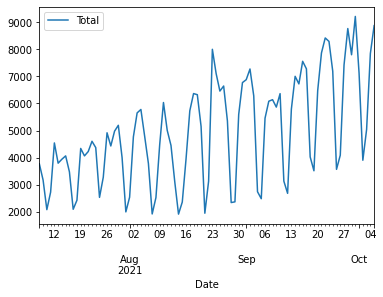

In [7]:
# plot the data
data.plot();

In [8]:
# with functional API
#from pycaret.time_series import *
#setup(data, fh = 7, fold = 3, session_id = 123)# with new object-oriented API
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
exp = TimeSeriesExperiment()
exp.setup(data, fh = 7, fold = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(90, 1)"
2,Missing Values,False
3,Transformed Train Set,"(83,)"
4,Transformed Test Set,"(7,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


In [9]:
#Exploratory Data Analysis
# functional API
#plot_model(plot = 'ts')# object-oriented API
exp.plot_model(plot = 'ts')

In [10]:
# cross-validation plot
exp.plot_model(plot = 'cv')

In [11]:
# Diagnostics plot
exp.plot_model(plot = 'diagnostics')

In [12]:
# Decomposition plot
exp.plot_model(plot = 'decomp_stl')

## Model Training

In [13]:
# functional API
#best = compare_models()# object-oriented API
best = exp.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2,TT (Sec)
auto_arima,Auto ARIMA,531.918,626.211,0.0911,0.0916,0.849,0.8632,2.9633
arima,ARIMA,568.497,687.251,0.0957,0.0975,0.9085,0.8316,0.0433
theta,Theta Forecaster,526.386,672.942,0.0921,0.0988,0.8452,0.8201,0.0300
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,571.175,672.961,0.1022,0.099,0.9132,0.8368,0.0400
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,583.112,715.558,0.1014,0.0996,0.9318,0.8204,0.6533
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,606.492,709.812,0.1052,0.1043,0.9706,0.8179,0.0733
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,616.389,731.383,0.1062,0.1049,0.9845,0.8118,0.7167
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,632.714,746.721,0.1081,0.1075,1.0093,0.8079,0.0333
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,632.713,746.721,0.1081,0.1075,1.0093,0.8079,0.0300
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,632.715,746.722,0.1081,0.1075,1.0093,0.8079,0.0333


In [14]:
# create fbprophet model
prophet = exp.create_model('prophet')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-09-07,579.0242,655.8335,0.1347,0.1232,0.9371,0.8212
1,2021-09-14,641.3026,816.9084,0.1024,0.1088,1.0449,0.7413
2,2021-09-21,870.3595,987.0935,0.1183,0.1250,1.3490,0.7477
Mean,NaT,696.8954,819.9451,0.1185,0.1190,1.1104,0.7701
SD,NaT,125.2650,135.2534,0.0132,0.0073,0.1744,0.0363


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [15]:
#Model Tuning
tuned_prophet = exp.tune_model(prophet)
print(tuned_prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-09-07,649.0172,711.2958,0.1351,0.1270,1.0504,0.7897
1,2021-09-14,585.7204,718.3293,0.0986,0.1071,0.9544,0.7999
2,2021-09-21,654.0680,707.8493,0.0942,0.0991,1.0138,0.8703
Mean,NaT,629.6019,712.4915,0.1093,0.1111,1.0062,0.8200
SD,NaT,31.0973,4.3612,0.0183,0.0117,0.0396,0.0358


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.07052367291265604,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=0.2772015819815348,
                     mcmc_samples=0, n_changepoints=25,
                     seasonality_mode='multiplicative',
                     seasonality_prior_scale=0.15960727025988383,
                     stan_backend=None, uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [16]:
# Model Plotting
exp.plot_model(tuned_prophet, plot = 'forecast')

In [17]:
# Best Model Plotting
exp.plot_model(best, plot = 'forecast')

In [18]:
# forecast in unknown future
exp.plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

In [19]:
# in-sample plot
exp.plot_model(best, plot = 'insample')

In [20]:
# residuals plot
exp.plot_model(best, plot = 'residuals')

In [21]:
# diagnostics plot
exp.plot_model(best, plot = 'diagnostics')

In [22]:
## Deployment
# finalize model
final_best = exp.finalize_model(best)# generate predictions
exp.predict_model(final_best, fh = 90)

2021-10-06     8392.9180
2021-10-07     9061.0279
2021-10-08     7701.1441
2021-10-09     4390.7528
2021-10-10     4972.7552
                 ...    
2021-12-30    13175.0791
2021-12-31    11815.1953
2022-01-01     8504.8040
2022-01-02     9086.8065
2022-01-03    12086.9226
Freq: D, Name: Total, Length: 90, dtype: float64

In [23]:
# save the model
exp.save_model(final_best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
           information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
           max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
           n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
           random_state=123, scoring='mse', scoring_args=None, seasonal=True,
           seasonal_test='ocsb', seasonal_test_args=None, sp=7, start_P=1,
           start_Q=1, start_p=2, start_params=None, ...), 'my_best_model.pkl')

In [24]:
# Loading the model
autoARIMA_saved = exp.load_model('my_best_model')

Transformation Pipeline and Model Successfully Loaded


In [25]:
print(autoARIMA_saved)

AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
          n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
          random_state=123, scoring='mse', scoring_args=None, seasonal=True,
          seasonal_test='ocsb', seasonal_test_args=None, sp=7, start_P=1,
          start_Q=1, start_p=2, start_params=None, ...)


## NYC Energy Consumption Dataset

In [26]:
df = pd.read_csv('/content/drive/MyDrive/nyc_energy_consumption.csv')

In [27]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [28]:
df = df[['timeStamp','demand']].rename({'timeStamp':'Date','demand':'Total'}, axis='columns')

In [29]:
df.head()

,Date,Total
0,2012-01-01 00:00:00,4937.5
1,2012-01-01 01:00:00,4752.1
2,2012-01-01 02:00:00,4542.6
3,2012-01-01 03:00:00,4357.7
4,2012-01-01 04:00:00,4275.5


In [30]:
ny_df=df.set_index('Date')

In [31]:
ny_df_monthly=ny_df.resample('M').mean()

In [32]:
ny_df_monthly.head()

,Total
Date,
2012-01-31,5757.495833
2012-02-29,5622.331609
2012-03-31,5479.845491
2012-04-30,5368.945833
2012-05-31,5867.896102


In [33]:
ny_df_monthly.shape

(68, 1)

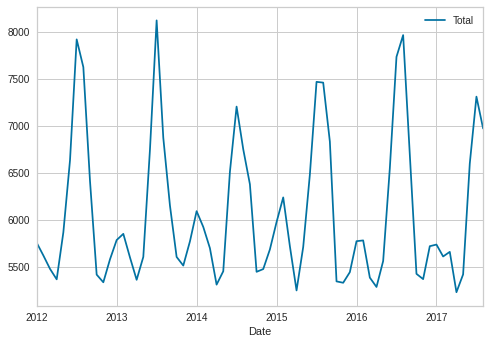

In [34]:
ny_df_monthly.plot();

In [36]:
exp_ny = TimeSeriesExperiment()
exp_ny.setup(ny_df_monthly, fh = 7, fold = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(68, 1)"
2,Missing Values,False
3,Transformed Train Set,"(61,)"
4,Transformed Test Set,"(7,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,12
9,Seasonality Detected,True


In [37]:
exp_ny.plot_model(plot = 'ts')

In [38]:
# Diagnostics plot
exp_ny.plot_model(plot = 'diagnostics')

In [39]:
# Decomposition plot
exp_ny.plot_model(plot = 'decomp_stl')

In [40]:
# Model Training
best = exp_ny.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,190.232,251.048,0.0285,0.0289,0.925,0.9001,0.1400
ets,ETS,197.176,274.943,0.0298,0.0304,0.9545,0.8685,0.1233
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,198.67,270.532,0.0307,0.031,0.9624,0.8425,0.5033
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,200.223,253.764,0.0314,0.0317,0.9692,0.8541,0.6500
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,208.497,254.689,0.0326,0.0329,1.0172,0.8621,0.0667
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,209.696,268.051,0.0325,0.0329,1.016,0.8504,0.0333
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,209.043,278.312,0.0326,0.0329,1.0146,0.8342,0.0333
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,211.46,270.461,0.033,0.0332,1.0237,0.8433,0.0333
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,210.24,274.454,0.0332,0.0334,1.0173,0.8264,0.6900
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,212.356,265.531,0.0333,0.0335,1.0283,0.8471,0.0300


In [41]:
# Best Model Plotting
exp_ny.plot_model(best, plot = 'forecast')

In [42]:
# forecast in unknown future
exp_ny.plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

In [43]:
# in-sample plot
exp_ny.plot_model(best, plot = 'insample')

In [44]:
# residuals plot
exp_ny.plot_model(best, plot = 'residuals')

In [45]:
# diagnostics plot
exp_ny.plot_model(best, plot = 'diagnostics')